In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import *

In [2]:
data = pd.read_csv("../PROYECTO_FINAL/Laptop_price.csv") 

#data = pd.read_csv("../Proyecto_Machine_Learning/Laptop_price.csv")
 
print(data.head())
print(data.shape)

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  
(1000, 7)


In [3]:
data_nueva = pd.read_csv("Laptop_price.csv")
data_nueva


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [4]:
data_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [5]:
#Contar la cantidad de memoria ram comprada segun su tamaño
memoria_ram = data_nueva['RAM_Size'].value_counts()
memoria_ram

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64

In [6]:
#comprar la cantidad de disco duro segun su tamaño
disco_duro = data_nueva['Storage_Capacity'].value_counts()
disco_duro

Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64

In [7]:
#Contar la cantidad de marcas de laptop
marcas = data_nueva['Brand'].value_counts()
marcas

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [8]:
#Contar la cantidad de procesadores de laptop
procesador = data_nueva['Processor_Speed'].round().value_counts()
procesador

Processor_Speed
3.0    402
2.0    394
4.0    204
Name: count, dtype: int64

In [9]:
#Contar la cantidad de pantallas de laptop 
pantalla = data_nueva['Screen_Size'].round().value_counts()
pantalla

Screen_Size
16.0    177
14.0    174
15.0    173
13.0    160
12.0    154
11.0     83
17.0     79
Name: count, dtype: int64

In [10]:
#Contar la cantidad de peso de las laptops
peso_laptop = data_nueva['Weight'].round().value_counts()
peso_laptop

Weight
4.0    343
3.0    330
2.0    180
5.0    147
Name: count, dtype: int64

In [11]:
#Contar los precios de las laptops
precio_laptops = data_nueva['Price'].round().value_counts()
precio_laptops

Price
17124.0    3
10425.0    3
31747.0    2
17863.0    2
16753.0    2
          ..
8939.0     1
31427.0    1
33370.0    1
16748.0    1
8808.0     1
Name: count, Length: 927, dtype: int64

In [12]:
#MOSTRAR EL PROMEDIO DE LA CAPACIDAD DE DISCO DURO POR MARCAS
average_storage_by_brand = data.groupby('Brand')['Storage_Capacity'].mean().sort_values()
average_storage_by_brand

Brand
Dell      558.552381
HP        578.652632
Asus      593.980583
Lenovo    596.126316
Acer      596.627451
Name: Storage_Capacity, dtype: float64

In [13]:
#MOSTRAR EL PROMEDIO DE LA CAPACIDAD DE MEMORIA RAM POR MARCAS
average_ram_by_brand = data.groupby('Brand')['RAM_Size'].mean().sort_values()
average_ram_by_brand

Brand
Asus      14.271845
HP        14.378947
Acer      15.803922
Lenovo    16.273684
Dell      16.723810
Name: RAM_Size, dtype: float64

In [14]:
#MOSTRAR EL PROMEDIO DE LA CAPACIDAD DE PROCESADOR POR MARCAS
average_procesador_by_brand = data.groupby('Brand')['Processor_Speed'].mean().sort_values()
average_procesador_by_brand

Brand
Dell      2.708288
Lenovo    2.717668
Acer      2.731009
HP        2.794093
Asus      2.803446
Name: Processor_Speed, dtype: float64

In [15]:
#MOSTRAR EL PROMEDIO DEL TAMAÑO DE PANTALLA POR MARCAS
average_screen_size_by_brand = data.groupby('Brand')['Screen_Size'].mean().sort_values()
average_screen_size_by_brand

Brand
HP        13.967940
Asus      14.006141
Lenovo    14.013942
Dell      14.100923
Acer      14.185162
Name: Screen_Size, dtype: float64

In [16]:
#MOSTRAR EL PROMEDIO DEL PESO DE LAPTOPS POR MARCAS
average_weight_by_brand = data.groupby('Brand')['Weight'].mean().sort_values()
average_weight_by_brand

Brand
HP        3.405050
Asus      3.428946
Dell      3.471309
Lenovo    3.484541
Acer      3.541957
Name: Weight, dtype: float64

In [17]:
#MOSTRAR EL PROMEDIO DEL PRECIO DE LAPTOPS POR MARCAS
average_price_by_brand = data.groupby('Brand')['Price'].mean().sort_values() 
average_price_by_brand

Brand
Dell      18866.009978
HP        19369.762930
Asus      19854.238277
Lenovo    19974.929725
Acer      19984.613620
Name: Price, dtype: float64

In [18]:
#MOSTRAR AGRUPACION DE DATA DE MEMORIA RAM POR MARCA
grouped_data = data.groupby(['Brand', 'RAM_Size']).size().reset_index(name='Count')
grouped_data

,Brand,RAM_Size,Count
0,Acer,4,50
1,Acer,8,48
2,Acer,16,47
3,Acer,32,59
4,Asus,4,47
5,Asus,8,66
6,Asus,16,47
7,Asus,32,46
8,Dell,4,48
9,Dell,8,43


In [19]:
#MOSTRAR AGRUPACION DE DATA DE PROCESADOR POR MARCA
grouped_data_procesador = data.round().groupby(['Brand','Processor_Speed']).size().reset_index(name='Count')
grouped_data_procesador

,Brand,Processor_Speed,Count
0,Acer,2.0,82
1,Acer,3.0,78
2,Acer,4.0,44
3,Asus,2.0,76
4,Asus,3.0,79
5,Asus,4.0,51
6,Dell,2.0,89
7,Dell,3.0,81
8,Dell,4.0,40
9,HP,2.0,69


In [20]:
#MOSTRAR AGRUPACION DE DATA DE DISCO DURO POR MARCA
grouped_data_storage_capacity = data.groupby(['Brand','Storage_Capacity']).size().reset_index(name='Count')
grouped_data_storage_capacity

,Brand,Storage_Capacity,Count
0,Acer,256,66
1,Acer,512,68
2,Acer,1000,70
3,Asus,256,77
4,Asus,512,54
5,Asus,1000,75
6,Dell,256,80
7,Dell,512,68
8,Dell,1000,62
9,HP,256,63


In [21]:
#MOSTRAR AGRUPACION DE PANTALLA POR MARCA
grouped_data_screen_size = data.round().groupby(['Brand','Screen_Size']).size().reset_index(name='Count')
grouped_data_screen_size

,Brand,Screen_Size,Count
0,Acer,11.0,12
1,Acer,12.0,28
2,Acer,13.0,39
3,Acer,14.0,31
4,Acer,15.0,39
5,Acer,16.0,36
6,Acer,17.0,19
7,Asus,11.0,22
8,Asus,12.0,33
9,Asus,13.0,30


In [22]:
#MOSTRAR AGRUPACION DE PESO POR MARCA
grouped_data_weight = data.round().groupby(['Brand','Weight']).size().reset_index(name='Count')
grouped_data_weight

,Brand,Weight,Count
0,Acer,2.0,32
1,Acer,3.0,66
2,Acer,4.0,74
3,Acer,5.0,32
4,Asus,2.0,37
5,Asus,3.0,77
6,Asus,4.0,62
7,Asus,5.0,30
8,Dell,2.0,34
9,Dell,3.0,74


In [23]:
#MOSTRAR AGRUPACION DE PRECIO POR MARCA
#grouped_data_price = data.round().groupby(['Brand','Price']).size().reset_index(name='Count')
#grouped_data_price

In [23]:
#MOSTRAR DISTRIBUCION DE LA RAM SEGUN SU MARCA
ram_distribution = data.groupby(['Brand', 'RAM_Size']).size().unstack(fill_value=0)
ram_distribution

RAM_Size,4,8,16,32
Brand,,,,
Acer,50,48,47,59
Asus,47,66,47,46
Dell,48,43,52,67
HP,59,38,49,44
Lenovo,39,51,42,58


In [24]:
#MOSTRAR DISTRIBUCION DEL DISCO DURO SEGUN SU MARCA
storage_distribution = data.groupby(['Brand','Storage_Capacity']).size().unstack(fill_value=0)
storage_distribution

Storage_Capacity,256,512,1000
Brand,,,
Acer,66,68,70
Asus,77,54,75
Dell,80,68,62
HP,63,68,59
Lenovo,71,49,70


In [25]:
#MOSTRAR DISTRIBUCION DEL TAMAÑO DE PANTALLA DE LAPTOP SEGUN SU MARCA
screen_size_distribution = data.round().groupby(['Brand','Screen_Size']).size().unstack(fill_value=0)
screen_size_distribution

Screen_Size,11.0,12.0,13.0,14.0,15.0,16.0,17.0
Brand,,,,,,,
Acer,12,28,39,31,39,36,19
Asus,22,33,30,37,24,38,22
Dell,18,30,34,34,44,40,10
HP,17,30,29,34,37,29,14
Lenovo,14,33,28,38,29,34,14


In [26]:
#MOSTRAR DISTRIBUCION DEL PROCESADOR SEGUN SU MARCA
procesador_distribution = data.round().groupby(['Brand','Processor_Speed']).size().unstack(fill_value=0)
procesador_distribution

Processor_Speed,2.0,3.0,4.0
Brand,,,
Acer,82,78,44
Asus,76,79,51
Dell,89,81,40
HP,69,84,37
Lenovo,78,80,32


In [27]:
#MOSTRAR DISTRIBUCION DE PESO DE LAPTOP SEGUN SU MARCA
weight_distribution = data.round().groupby(['Brand','Weight']).size().unstack(fill_value=0)
weight_distribution

Weight,2.0,3.0,4.0,5.0
Brand,,,,
Acer,32,66,74,32
Asus,37,77,62,30
Dell,34,74,70,32
HP,47,50,66,27
Lenovo,30,63,71,26


In [28]:
#MOSTRAR LA LAPTOP MAS CARA DE CADA EMPRESA
marca_maxima = data.groupby('Brand')['Price'].idxmax()
laptop_cara = data.loc[marca_maxima]
laptop_cara

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
338,Acer,3.208147,32,1000,16.890244,3.675057,33370.442080
889,Asus,3.655036,32,1000,16.568611,3.511066,33239.412260
610,Dell,3.610426,32,1000,14.985210,2.073854,33489.969689
989,HP,3.737794,32,1000,13.013740,3.633786,33309.869501
424,Lenovo,3.877159,32,1000,13.783941,3.561348,33503.935037


In [29]:
#MOSTRAR LA LAPTOP MAS BARATA DE CADA EMPRESA
marca_minima = data.groupby('Brand')['Price'].idxmin()
laptop_barata = data.loc[marca_minima]
laptop_barata

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
562,Acer,2.192069,4,256,13.849706,2.365086,8931.641590
952,Asus,3.400725,4,256,14.356433,2.847104,8966.377697
833,Dell,2.625927,4,256,16.374188,3.017969,8836.578529
425,HP,1.877645,4,256,12.584026,4.983746,8570.012950
899,Lenovo,1.670431,4,256,15.088118,3.593328,8780.660812


In [30]:
#Verificar si hay valores nulos en data
data_nueva.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [31]:
data_nueva.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


EDA

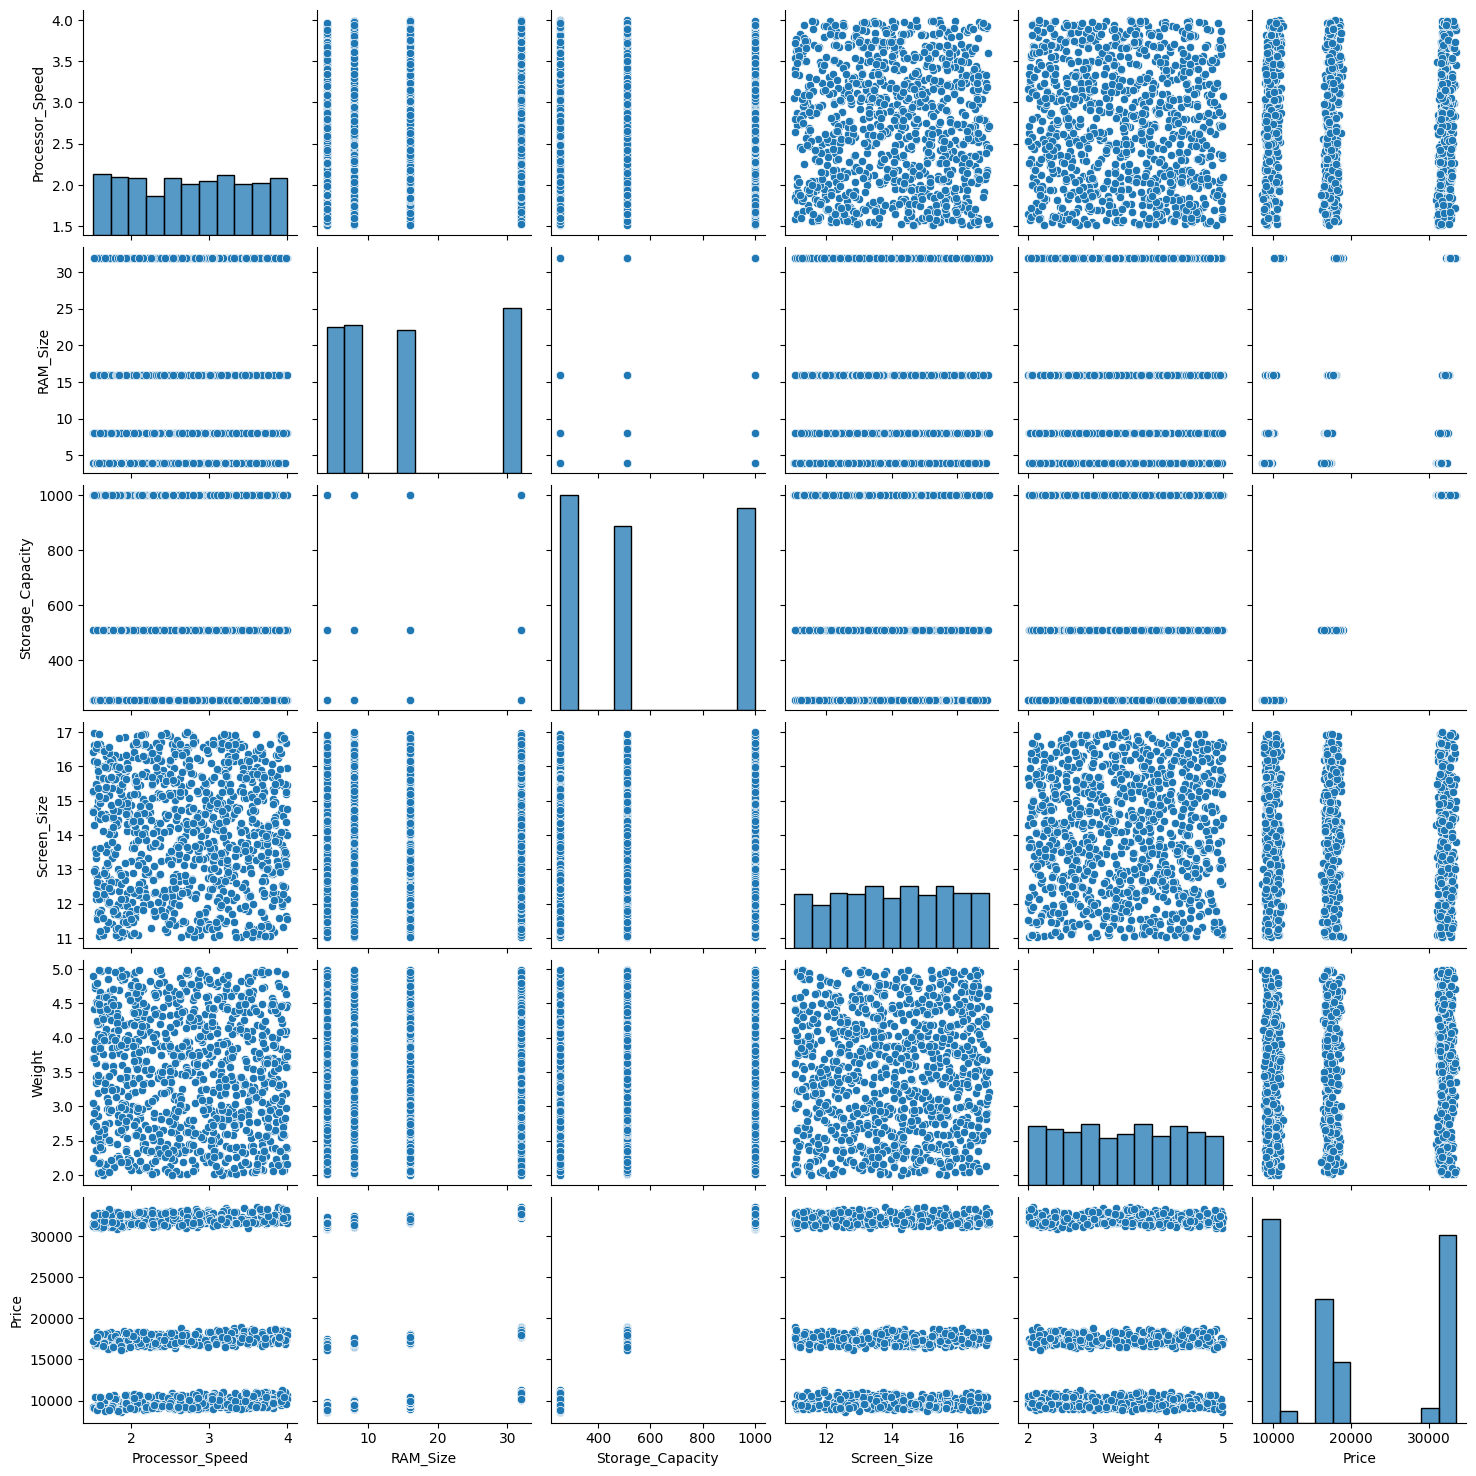

In [9]:
#Ploteo de la data
sns.pairplot(data_nueva)

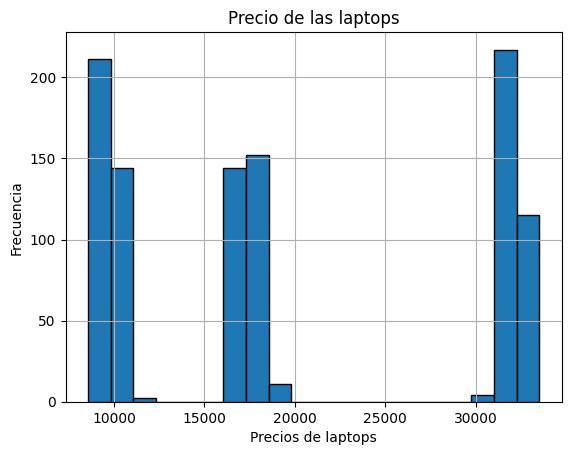

In [33]:
#Grafica para los precios de las laptops
data_nueva['Price'].hist(bins=20, edgecolor='black')
plt.title('Precio de las laptops')
plt.xlabel('Precios de laptops')
plt.ylabel('Frecuencia')
plt.show()

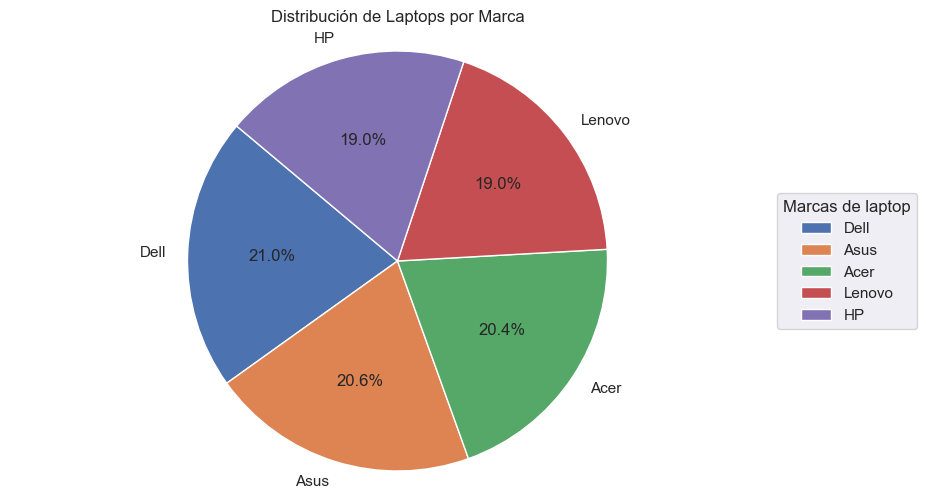

In [35]:
#Grafica para las marcas de laptop USANDO PIE
plt.figure(figsize=(10, 6))  
plt.pie(marcas, labels=marcas.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de Laptops por Marca')
plt.legend(title='Marcas de laptop', labels=marcas.index,loc='center', bbox_to_anchor=(1.08,0.5))
plt.show()

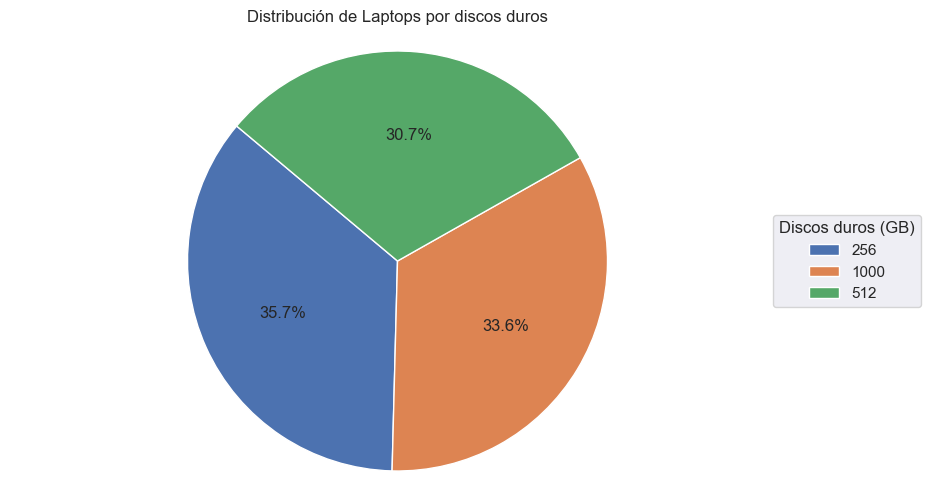

In [36]:
#Grafica de los discos duros de laptop
plt.figure(figsize=(10, 6))  
plt.pie(disco_duro, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de Laptops por discos duros')
plt.legend(title='Discos duros (GB)', labels=disco_duro.index,loc='center', bbox_to_anchor=(1.08,0.5))
plt.show()

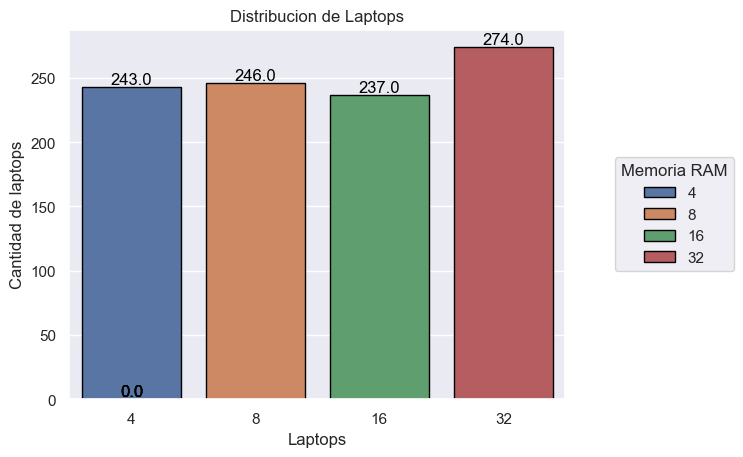

In [62]:
#Grafica para la memoria RAM de laptop
sns.set_theme(style='darkgrid')
ax1=sns.barplot(x=memoria_ram.index, y=memoria_ram.values, palette='deep',hue=memoria_ram.index, edgecolor='black')

ax1 = plt.gca()
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

#for i in range(len(memoria_ram)):
#    plt.text(x=i, y=memoria_ram[i], s=memoria_ram[i], ha='center', va='bottom')

plt.title('Distribucion de Laptops por memoria RAM')
plt.xlabel('Laptops')
plt.ylabel('Cantidad de laptops')
plt.legend(title='Memoria RAM',loc='center', bbox_to_anchor=(1.22,0.5))
plt.show()

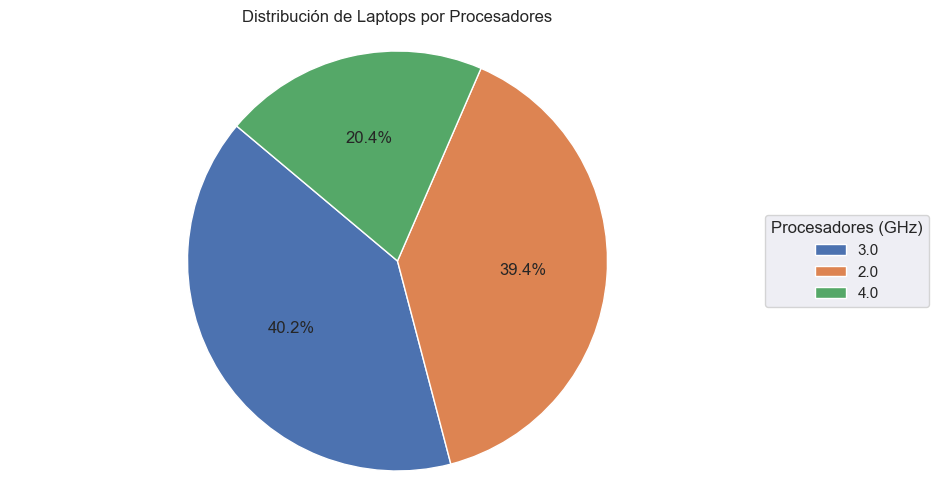

In [38]:
#Grafica para los procesadores de laptop
plt.figure(figsize=(10, 6))  
plt.pie(procesador, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de Laptops por Procesadores')
plt.legend(title='Procesadores (GHz)', labels=procesador.index,loc='center', bbox_to_anchor=(1.08,0.5))
plt.show()

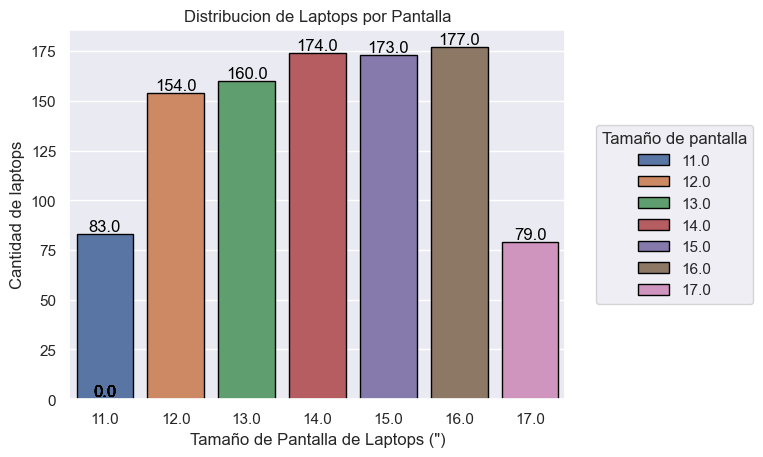

In [131]:
#Grafica de las pantallas para las laptops
sns.set_theme(style='darkgrid')
ax=sns.barplot(x=pantalla.index, y=pantalla.values, palette='deep', hue=pantalla.index, edgecolor='black')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}'.format(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Distribucion de Laptops por Pantalla')
plt.xlabel('Tamaño de Pantalla de Laptops (")')
plt.ylabel('Cantidad de laptops')
plt.legend(title='Tamaño de pantalla', loc='center', bbox_to_anchor=(1.22,0.5))
plt.show()

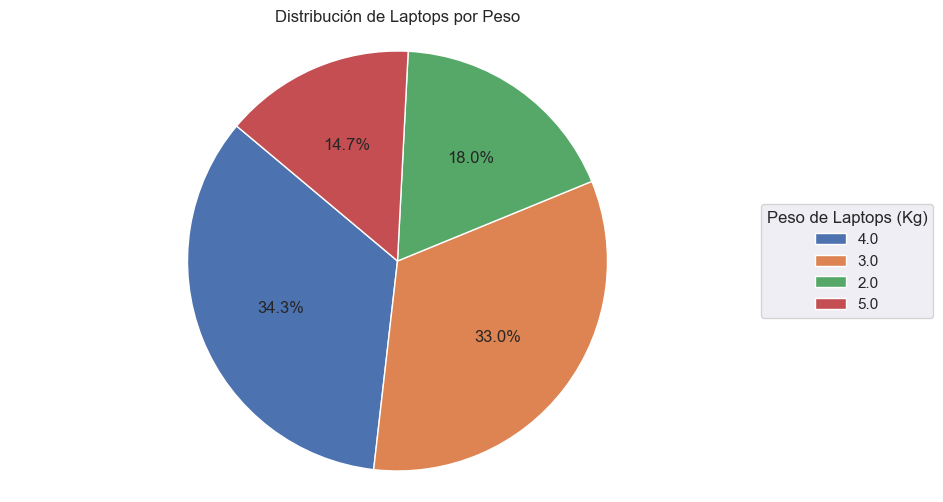

In [40]:
#GRAFICA DE PESO DE LAS LAPTOPS
plt.figure(figsize=(10, 6))  
plt.pie(peso_laptop, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de Laptops por Peso')
plt.legend(title='Peso de Laptops (Kg)', labels=peso_laptop.index,loc='center', bbox_to_anchor=(1.08,0.5))
plt.show()

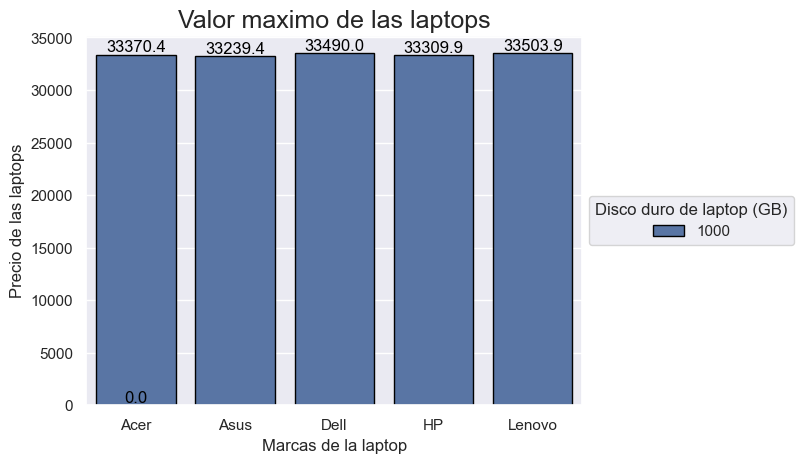

In [149]:
#PRECIO MAXIMO DE LAS LAPTOPS SEGUN SU MARCA
sns.set_theme(style='darkgrid')
ax=sns.barplot(x=laptop_cara['Brand'], y=laptop_cara['Price'], palette='deep', hue=laptop_cara['Storage_Capacity'],
               edgecolor='black')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}'.format(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Valor maximo de las laptops', fontsize=18)
plt.xlabel('Marcas de la laptop')
plt.ylabel('Precio de las laptops')
plt.legend(title='Disco duro de laptop (GB)', loc='center', bbox_to_anchor=(1.22,0.5))
plt.show()

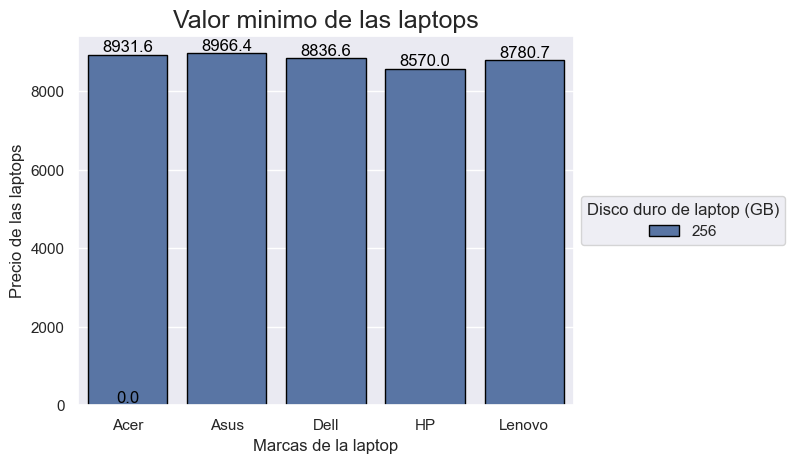

In [151]:
#PRECIO MINIMO DE LAS LAPTOPS SEGUN SU MARCA
sns.set_theme(style='darkgrid')
ax=sns.barplot(x=laptop_barata['Brand'], y=laptop_barata['Price'], palette='deep', hue=laptop_barata['Storage_Capacity'],
               edgecolor='black')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.1f}'.format(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Valor minimo de las laptops', fontsize=18)
plt.xlabel('Marcas de la laptop')
plt.ylabel('Precio de las laptops')
plt.legend(title='Disco duro de laptop (GB)', loc='center', bbox_to_anchor=(1.22,0.5))
plt.show()

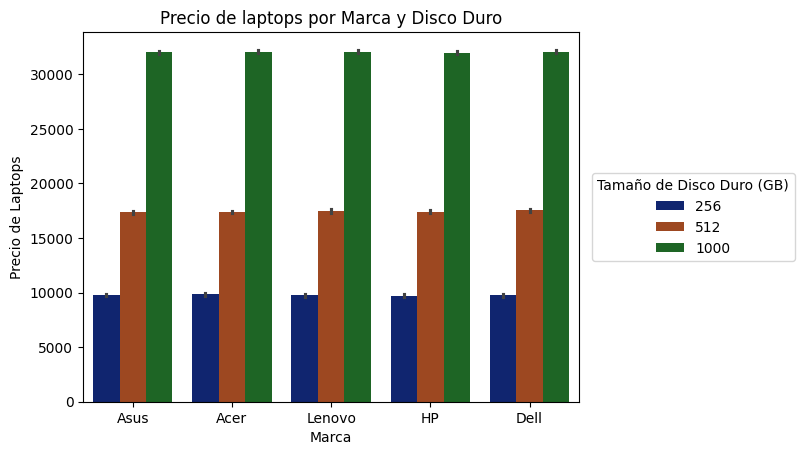

In [43]:
#GRAFICA DEl PRECIO DE LAPTOP POR MARCA Y DISCO DURO
sns.barplot(data=data_nueva, x=data_nueva['Brand'], y=data_nueva['Price'], hue=data_nueva['Storage_Capacity'],
                palette='dark')
plt.xlabel('Marca')
plt.ylabel('Precio de Laptops')
plt.title('Precio de laptops por Marca y Disco Duro')
plt.legend(title='Tamaño de Disco Duro (GB)',loc='center', bbox_to_anchor=(1.23,0.5))
plt.show()


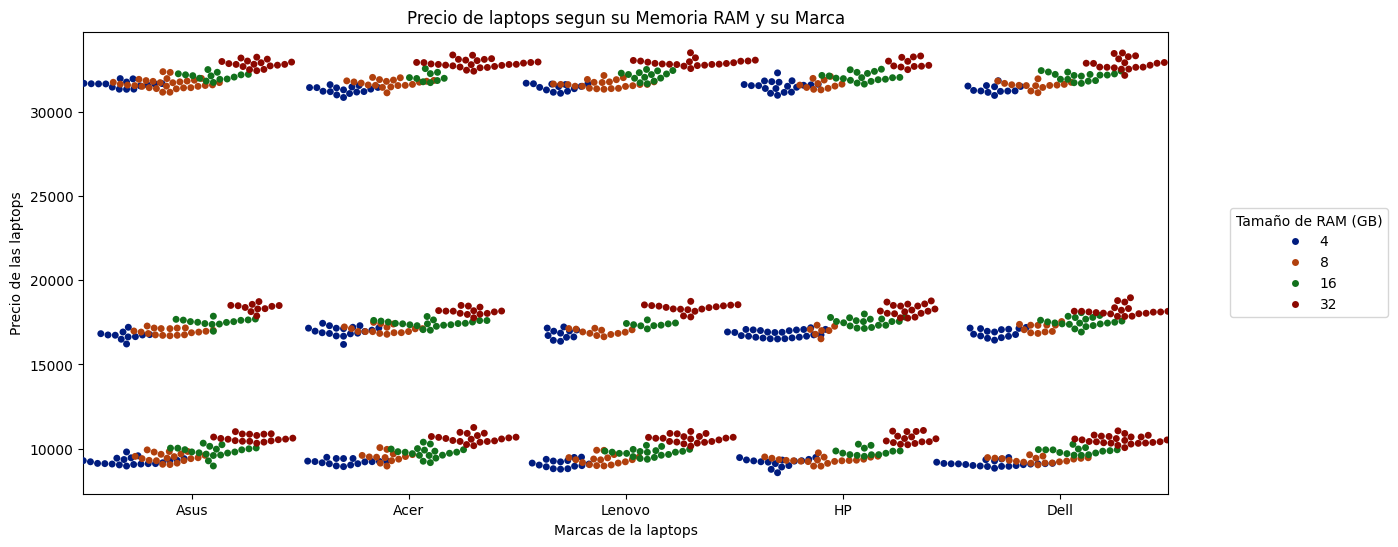

In [44]:
#GRAFICA DE PRECIO DE LAPTOP POR MEMORIA RAM 
#sns.displot(data=data_nueva, x='Price',hue='RAM_Size', kind='kde', legend=True, palette='dark', fill=True,col='RAM_Size')
plt.figure(figsize=(14,6))
sns.swarmplot(data=data_nueva, x='Brand', y='Price', hue='RAM_Size',  palette='dark', dodge=True)
plt.title('Precio de laptops segun su Memoria RAM y su Marca')
plt.xlabel('Marcas de la laptops')
plt.ylabel('Precio de las laptops')
plt.legend(title='Tamaño de RAM (GB)',loc='center', bbox_to_anchor=(1.13,0.5))
plt.show()

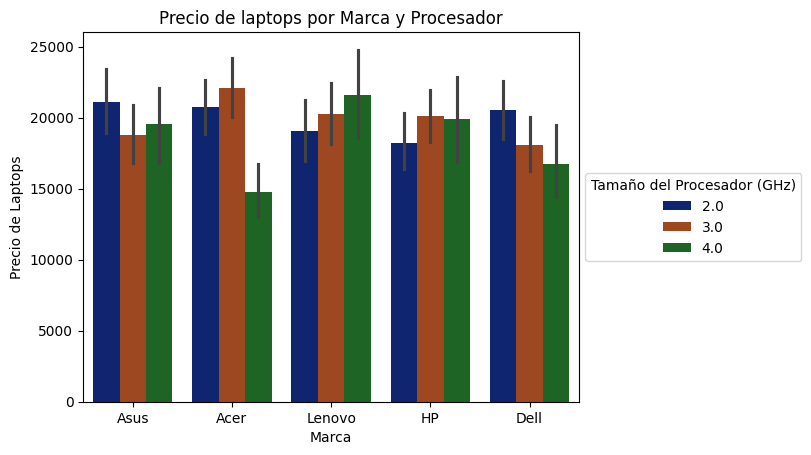

In [45]:
#GRAFICA DE PRECIO DE LAPTOP POR PROCESADOR
sns.barplot(data=data_nueva, x=data_nueva['Brand'], y=data_nueva['Price'], hue=data_nueva['Processor_Speed'].round(),
                palette='dark')
plt.xlabel('Marca')
plt.ylabel('Precio de Laptops')
plt.title('Precio de laptops por Marca y Procesador')
plt.legend(title='Tamaño del Procesador (GHz)',loc='center', bbox_to_anchor=(1.23,0.5))
plt.show()

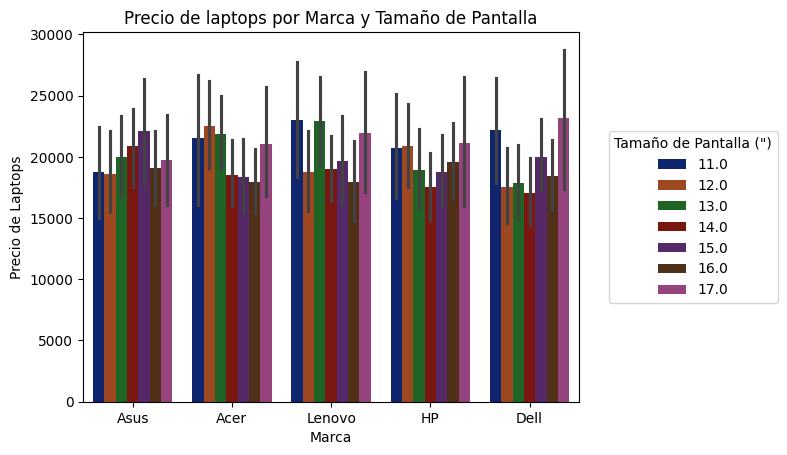

In [46]:
#GRAFICA DE PRECIO DE LAPTOP POR TAMAÑO DE PANTALLA
#GRAFICA DEl PRECIO DE LAPTOP POR MARCA Y DISCO DURO
sns.barplot(data=data_nueva, x=data_nueva['Brand'], y=data_nueva['Price'], hue=data_nueva['Screen_Size'].round(),
                palette='dark')
plt.xlabel('Marca')
plt.ylabel('Precio de Laptops')
plt.title('Precio de laptops por Marca y Tamaño de Pantalla')
plt.legend(title='Tamaño de Pantalla (")',loc='center', bbox_to_anchor=(1.23,0.5))
plt.show()

In [88]:
precio = data_nueva[(data_nueva['Brand']=='Lenovo') & (data_nueva['Price'].idxmin()) & 
                  (data_nueva['RAM_Size'] == 4) & (data_nueva['Storage_Capacity']==256)]
precio

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
26,Lenovo,2.333748,4,256,14.205743,2.262774,9264.933977
195,Lenovo,3.236741,4,256,13.996591,3.663070,9141.792984
222,Lenovo,3.788721,4,256,15.835067,3.467107,9477.922639
244,Lenovo,2.848728,4,256,14.129596,3.653153,9024.890809
474,Lenovo,3.237455,4,256,15.398022,2.995959,8957.611389
503,Lenovo,3.266189,4,256,15.486766,3.705657,9365.556673
504,Lenovo,1.578965,4,256,15.861552,2.177531,8990.324453
584,Lenovo,1.908810,4,256,15.660820,3.736933,9087.071603


In [13]:
precio['RAM_Size'].value_counts()

RAM_Size
8     22
32    21
16    14
4     13
Name: count, dtype: int64

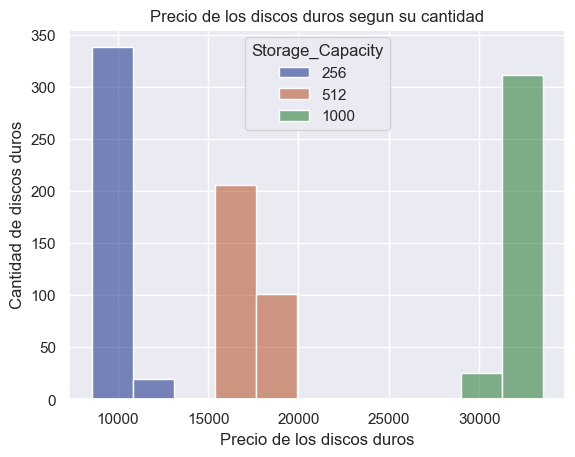

In [85]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO DURO
sns.histplot(data=data_nueva, x='Price', hue='Storage_Capacity', palette='dark')
plt.title('Precio de los discos duros segun su cantidad')
plt.xlabel('Precio de los discos duros')
plt.ylabel('Cantidad de discos duros')
plt.show()

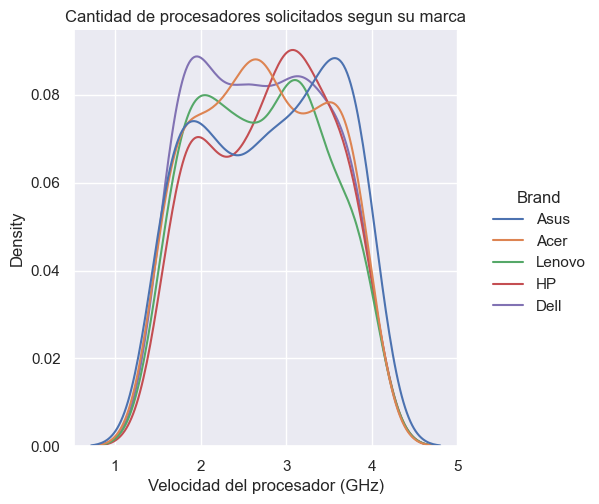

In [87]:
#GRAFICA DE PROCESADORES POR MARCA
#sns.displot(data=data_nueva, x='Processor_Speed', hue='Brand', kind='kde',fill=True, col='Brand')
sns.displot(data=data_nueva, x='Processor_Speed', hue='Brand', kind='kde')
plt.title('Cantidad de procesadores solicitados segun su marca')
plt.xlabel('Velocidad del procesador (GHz)')
plt.grid(True)
plt.show()

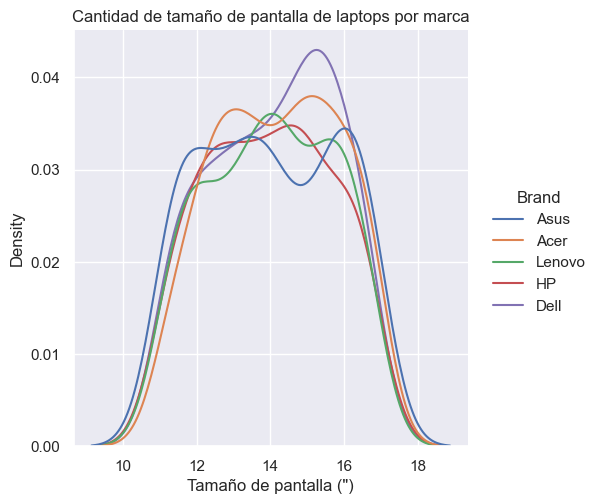

In [52]:
#GRAFICA DE TAMAÑO DE PANTALLA POR MARCA
#sns.displot(data=data_nueva, x='Screen_Size', hue='Brand', kind='kde', fill=True, bw_adjust=1,col='Brand')
sns.displot(data=data_nueva, x='Screen_Size', hue='Brand', kind='kde')
plt.title('Cantidad de tamaño de pantalla de laptops por marca')
plt.xlabel('Tamaño de pantalla (")')
plt.grid(True)
plt.show()

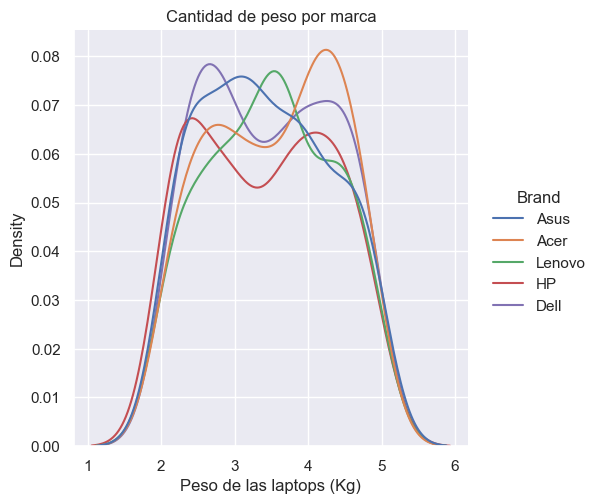

In [137]:
#GRAFICA DE PESO DE PANTALLA POR MARCA
sns.set_style('darkgrid')
sns.displot(data=data_nueva, x='Weight', hue='Brand', kind='kde')
plt.title('Cantidad de peso por marca')
plt.xlabel('Peso de las laptops (Kg)')
plt.grid(True)
plt.show()

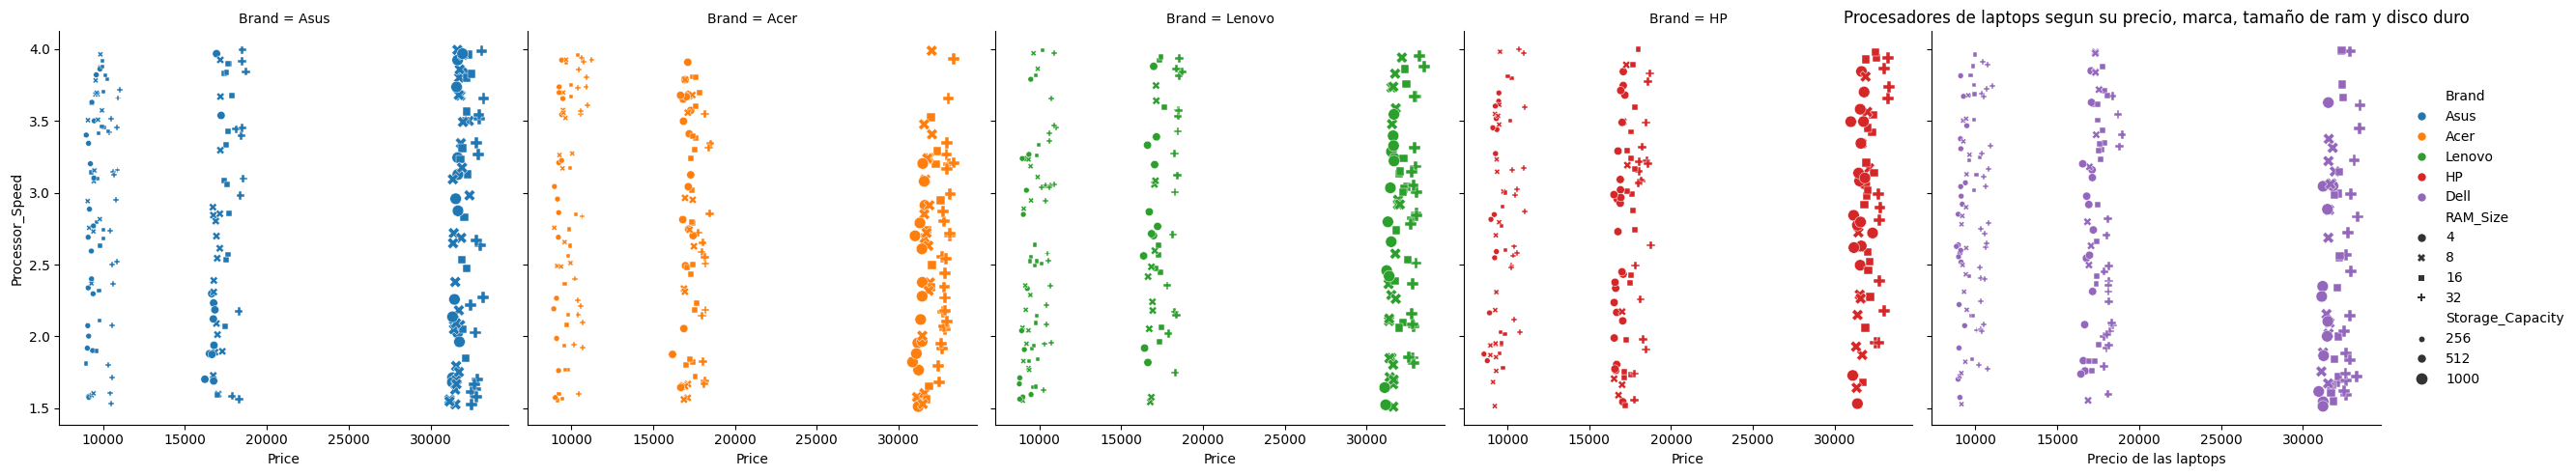

In [15]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO SEGUN SU MARCA Y TAMAÑO DE RAM
sns.relplot(data=data_nueva, x='Price', y='Processor_Speed', hue='Brand', style='RAM_Size',
           size='Storage_Capacity', kind='scatter', col='Brand')
#plt.legend(loc='center', bbox_to_anchor=(1.22,0.5))
plt.title('Procesadores de laptops segun su precio, marca, tamaño de ram y disco duro')
plt.xlabel('Precio de las laptops')
plt.ylabel('Procesadores de las laptops')
plt.show()

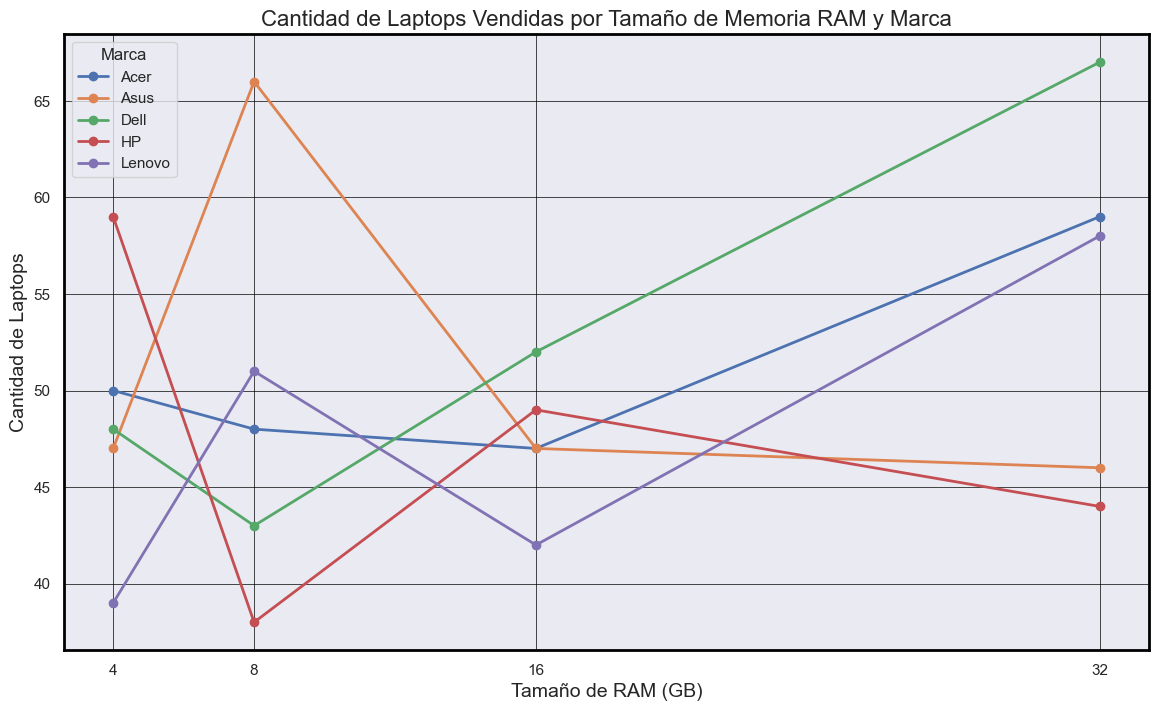

In [129]:
#GRAFICA DE LA AGRUPACION DE LA DATA POR MARCA Y MEMORIA RAM
plt.figure(figsize=(14, 8))
for brand in grouped_data['Brand'].unique():

    brand_data = grouped_data[grouped_data['Brand'] == brand]
    plt.plot(brand_data['RAM_Size'], brand_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Tamaño de RAM (GB)', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de Memoria RAM y Marca', fontsize=16)
plt.legend(title='Marca')
plt.xticks(grouped_data['RAM_Size'].unique())  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

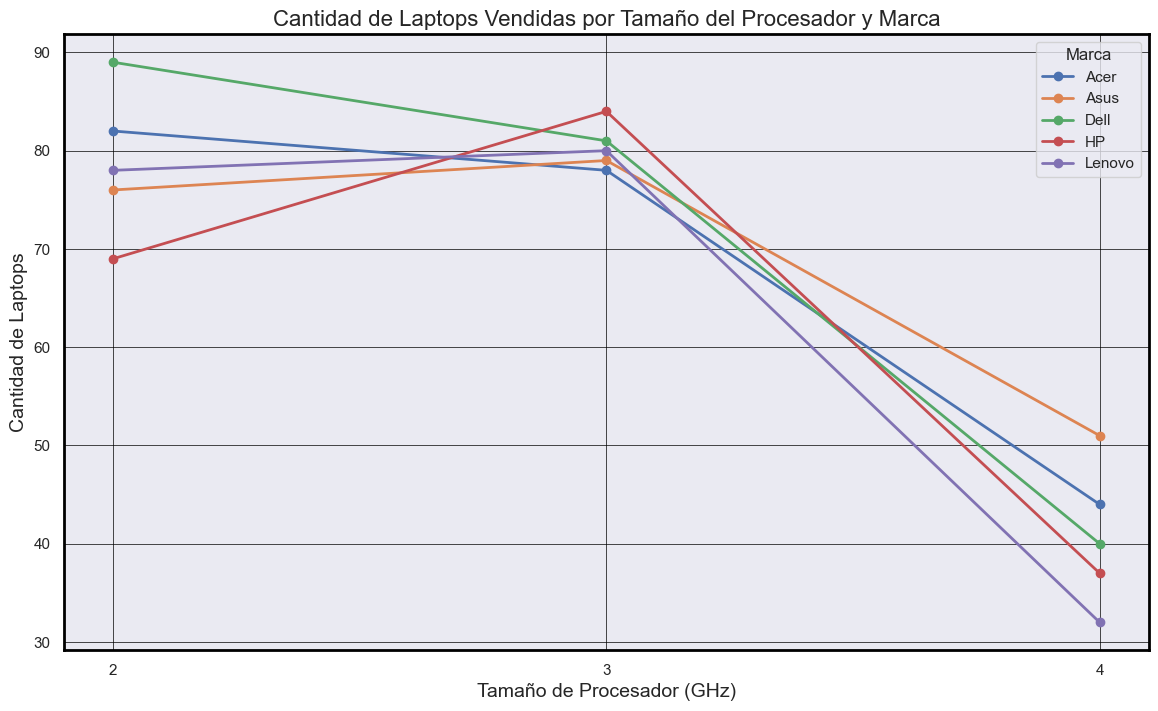

In [128]:
#GRAFICA DE LA AGRUPACION DE LA DATA POR MARCA Y PROCESADOR
plt.figure(figsize=(14, 8))
for brand in grouped_data_procesador['Brand'].unique():

    processador_data = grouped_data_procesador[grouped_data_procesador['Brand'] == brand]
    plt.plot(processador_data['Processor_Speed'], processador_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Tamaño de Procesador (GHz)', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño del Procesador y Marca', fontsize=16)
plt.legend(title='Marca')
plt.xticks(grouped_data_procesador['Processor_Speed'].unique()) 
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

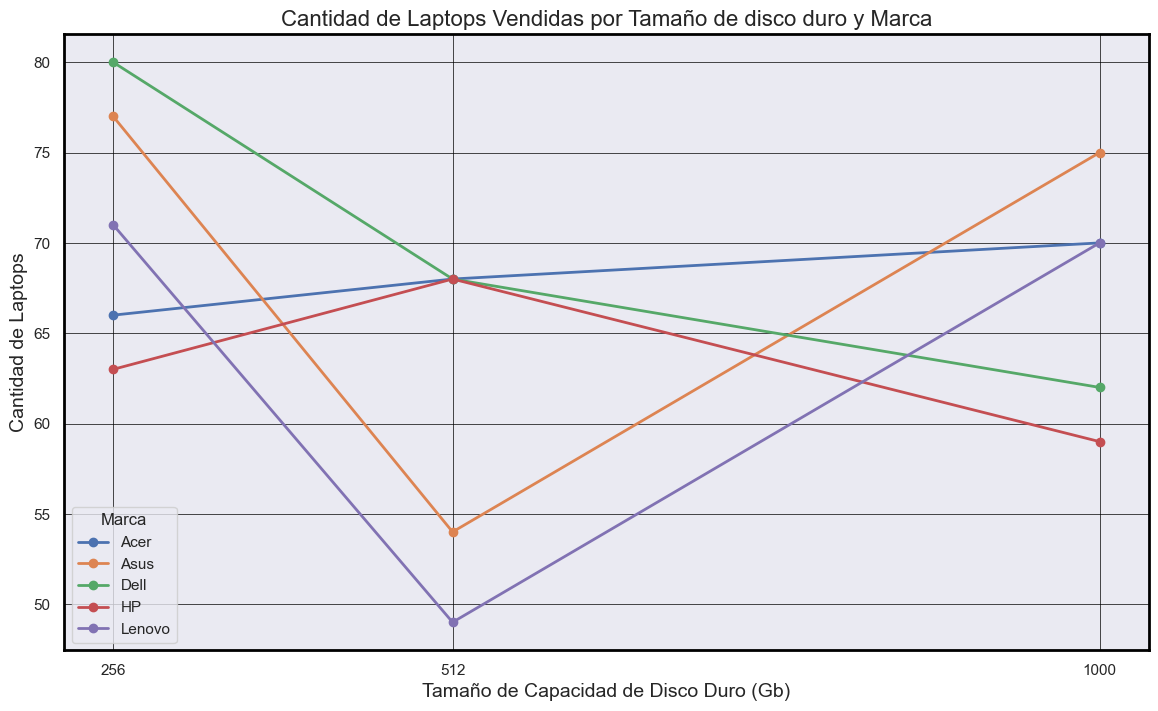

In [127]:
#GRAFICA DE AGRUPACION DE LA DATA POR DISCO DURO Y MARCA
plt.figure(figsize=(14, 8))
for brand in grouped_data_storage_capacity['Brand'].unique():

    storage_data = grouped_data_storage_capacity[grouped_data_storage_capacity['Brand'] == brand]
    plt.plot(storage_data['Storage_Capacity'], storage_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Tamaño de Capacidad de Disco Duro (Gb)', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de disco duro y Marca', fontsize=16)
plt.legend(title='Marca')
plt.xticks(grouped_data_storage_capacity['Storage_Capacity'].unique()) 
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

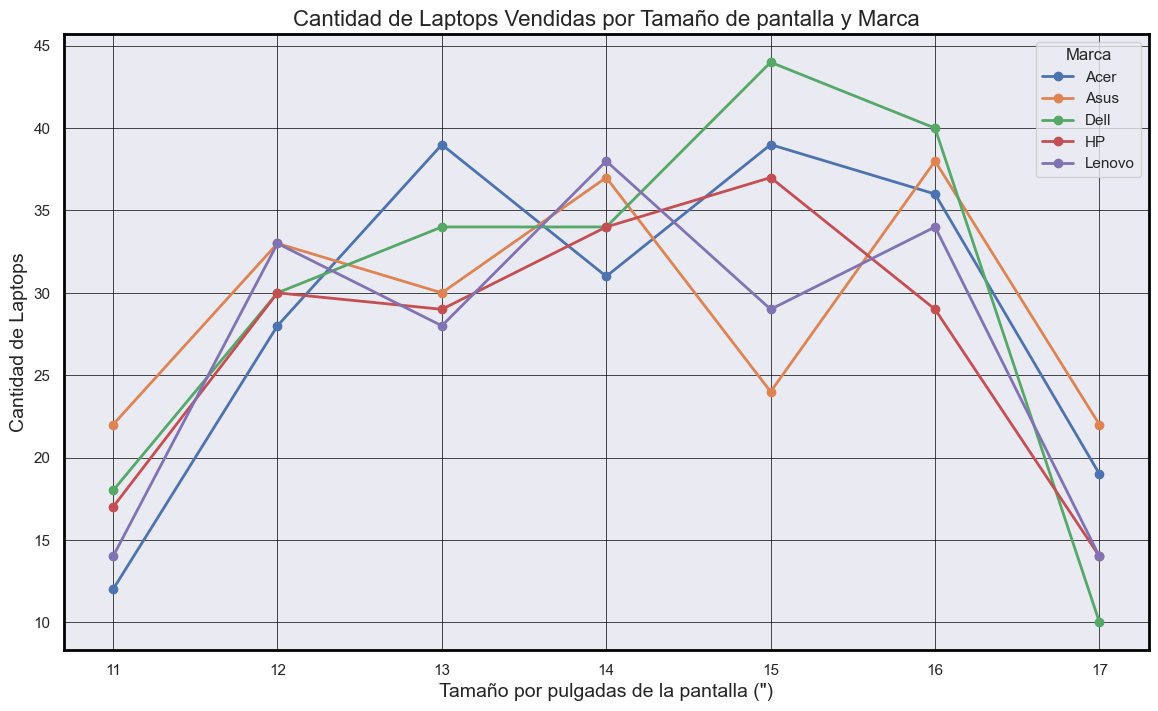

In [126]:
#GRAFICA DE AGRUPACION DE LA DATA POR PANTALLA Y MARCA
plt.figure(figsize=(14, 8))
for brand in grouped_data_screen_size['Brand'].unique():

    screen_data = grouped_data_screen_size[grouped_data_screen_size['Brand'] == brand]
    plt.plot(screen_data['Screen_Size'], screen_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Tamaño por pulgadas de la pantalla (")', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de pantalla y Marca', fontsize=16)
plt.legend(title='Marca')
plt.xticks(grouped_data_screen_size['Screen_Size'].unique())
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

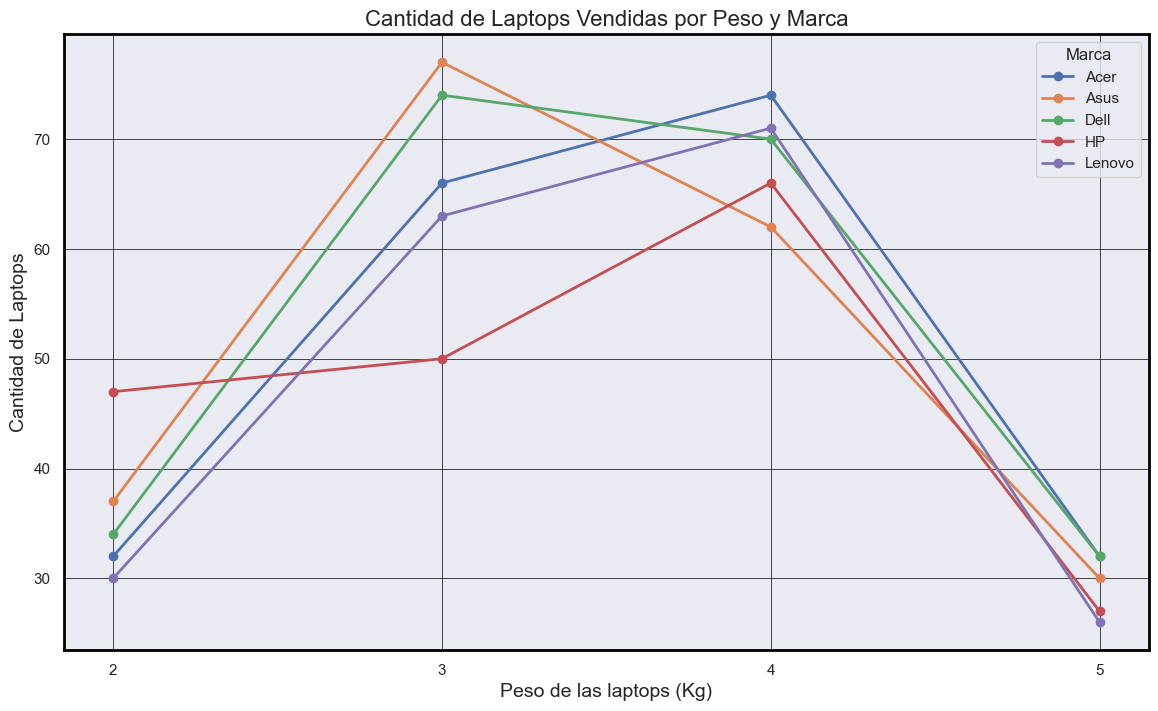

In [125]:
#GRAFICA DE AGRUPACION DE LA DATA POR PESO Y MARCA
plt.figure(figsize=(14, 8))
for brand in grouped_data_weight['Brand'].unique():

    weight_data = grouped_data_weight[grouped_data_weight['Brand'] == brand]
    plt.plot(weight_data['Weight'], weight_data['Count'], marker='o', linestyle='-', linewidth=2, label=brand)

plt.xlabel('Peso de las laptops (Kg)', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Peso y Marca', fontsize=16)
plt.legend(title='Marca')
plt.xticks(grouped_data_weight['Weight'].unique())
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

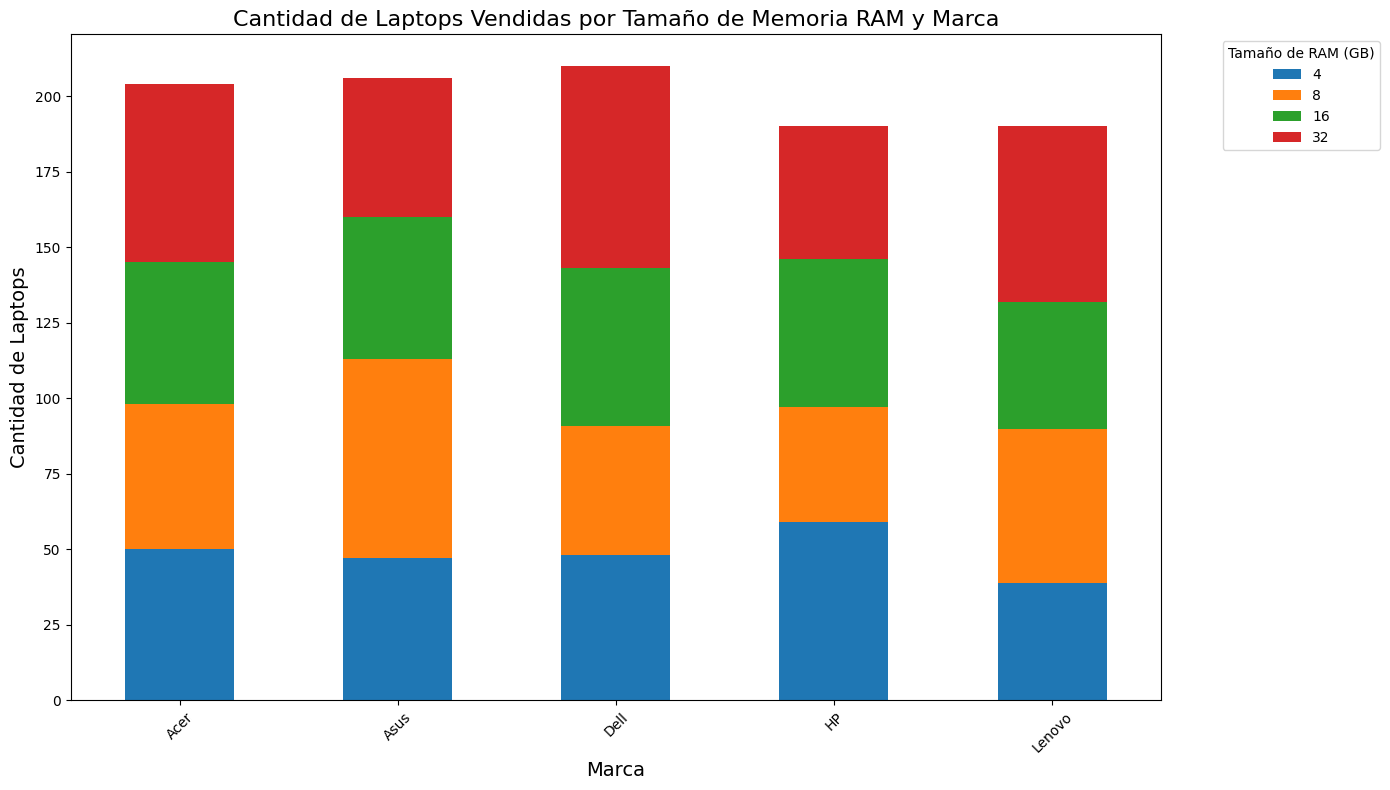

In [14]:
#MOSTRAR LA GRAFICA DE LA AGRUPACION DE LA RAM SEGUN SU MARCA
ram_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Cantidad de Laptops', fontsize=14) 
plt.title('Cantidad de Laptops Vendidas por Tamaño de Memoria RAM y Marca', fontsize=16) 
plt.legend(title='Tamaño de RAM (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

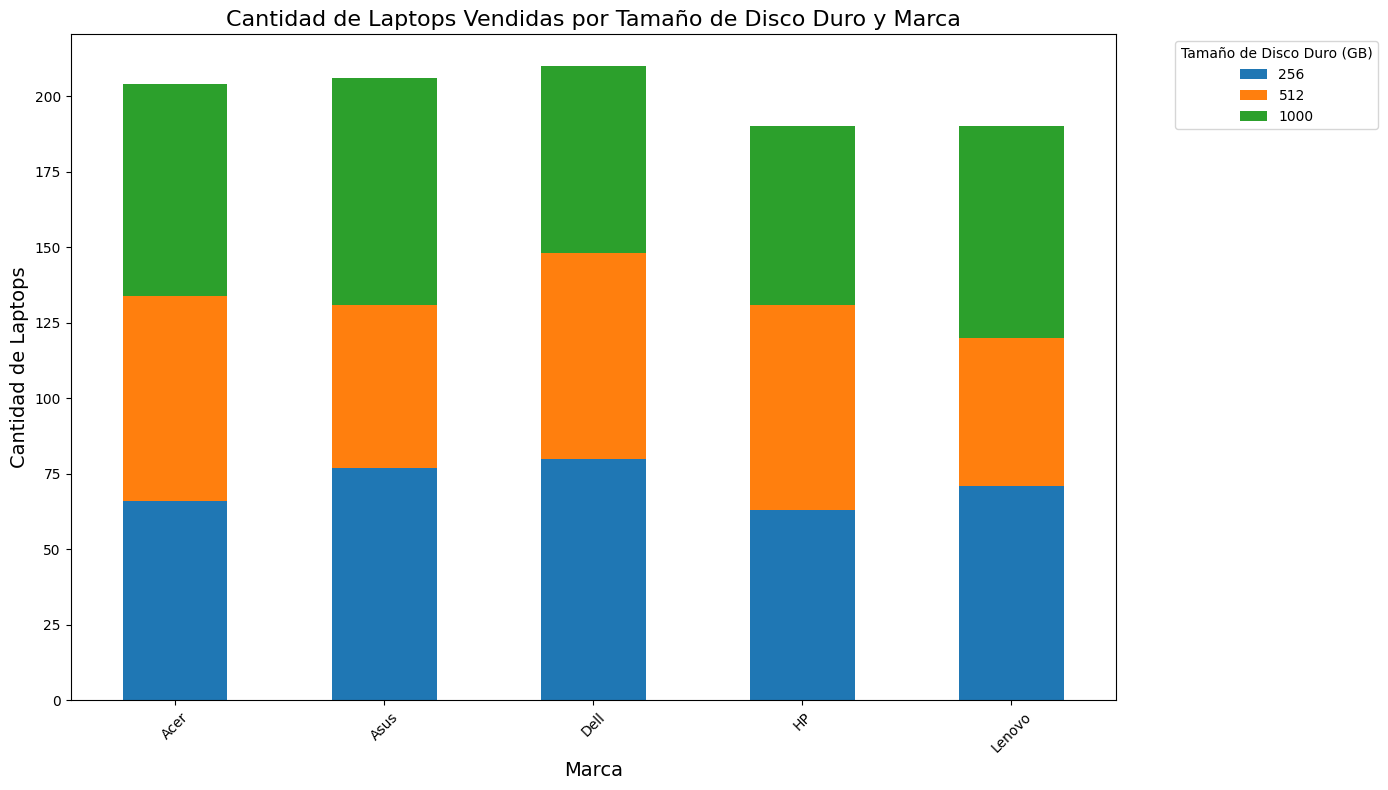

In [48]:
#MOSTRAR LA GRAFICA DE LA AGRUPACION DEL DISCO DURO SEGUN SU MARCA
storage_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de Disco Duro y Marca', fontsize=16)
plt.legend(title='Tamaño de Disco Duro (GB)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

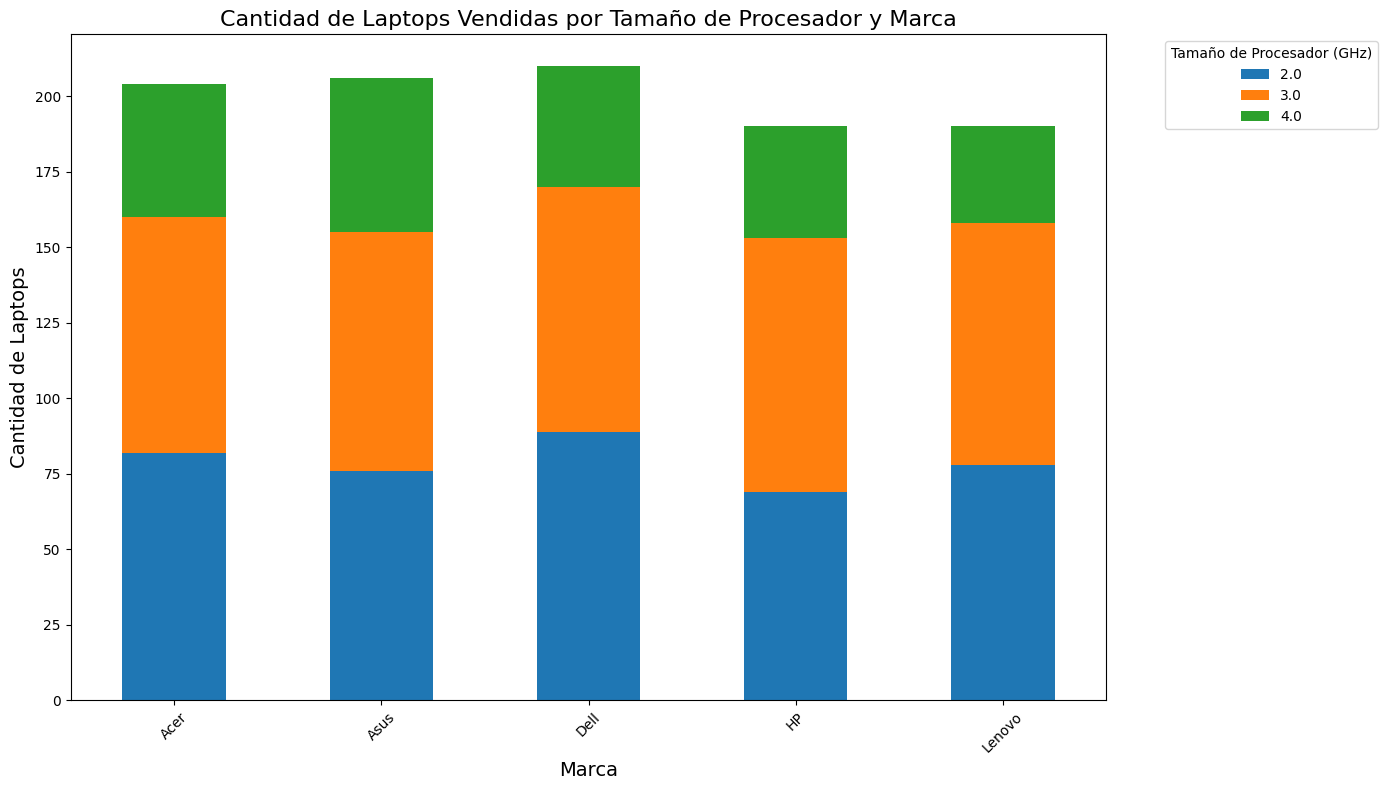

In [49]:
#MOSTRAR LA GRAFICA DE LA AGRUPACION DEL PROCESADOR SEGUN SU MARCA
procesador_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de Procesador y Marca', fontsize=16)
plt.legend(title='Tamaño de Procesador (GHz)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

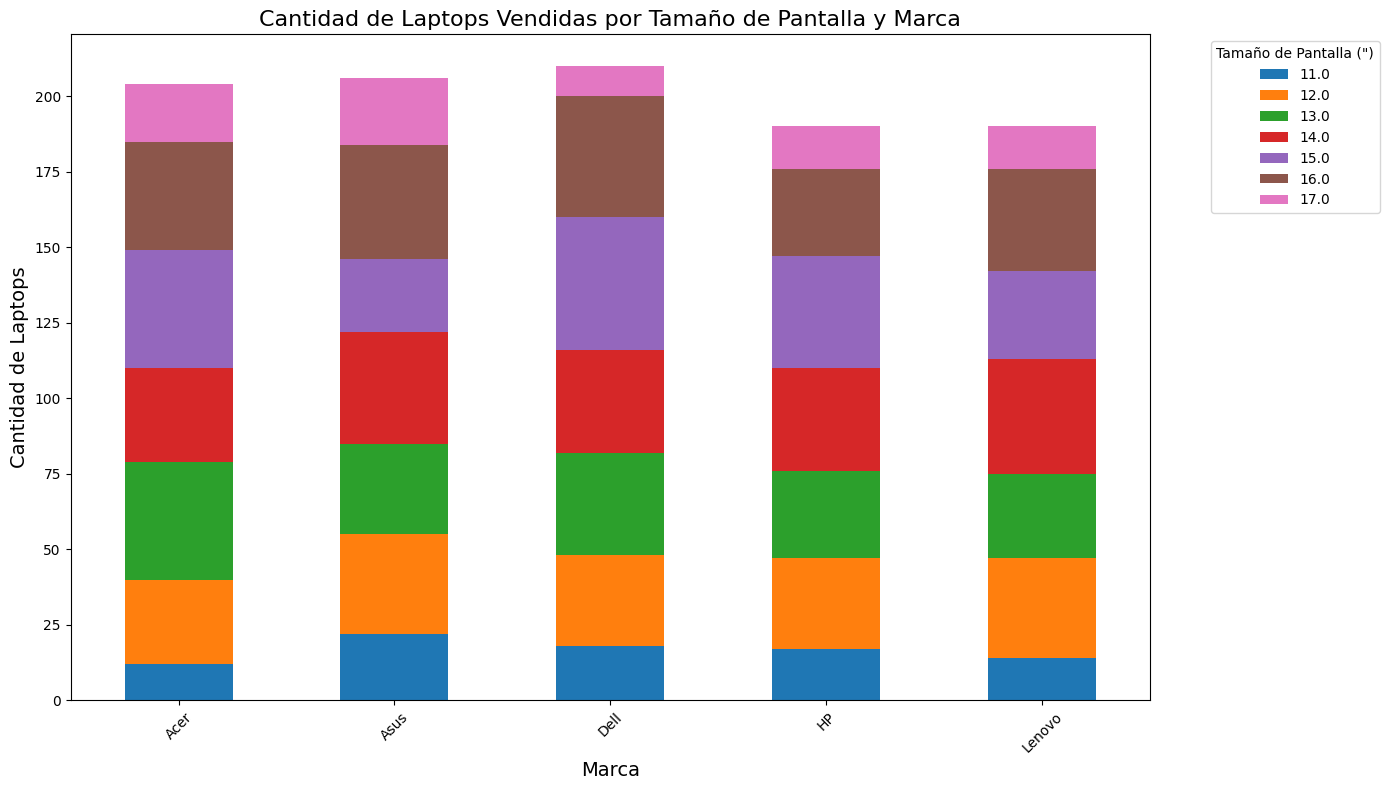

In [50]:
#MOSTRAR LA GRAFICA DE LA AGRUPACION DE LA PANTALLA SEGUN SU MARCA
screen_size_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.title('Cantidad de Laptops Vendidas por Tamaño de Pantalla y Marca', fontsize=16)
plt.legend(title='Tamaño de Pantalla (")', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

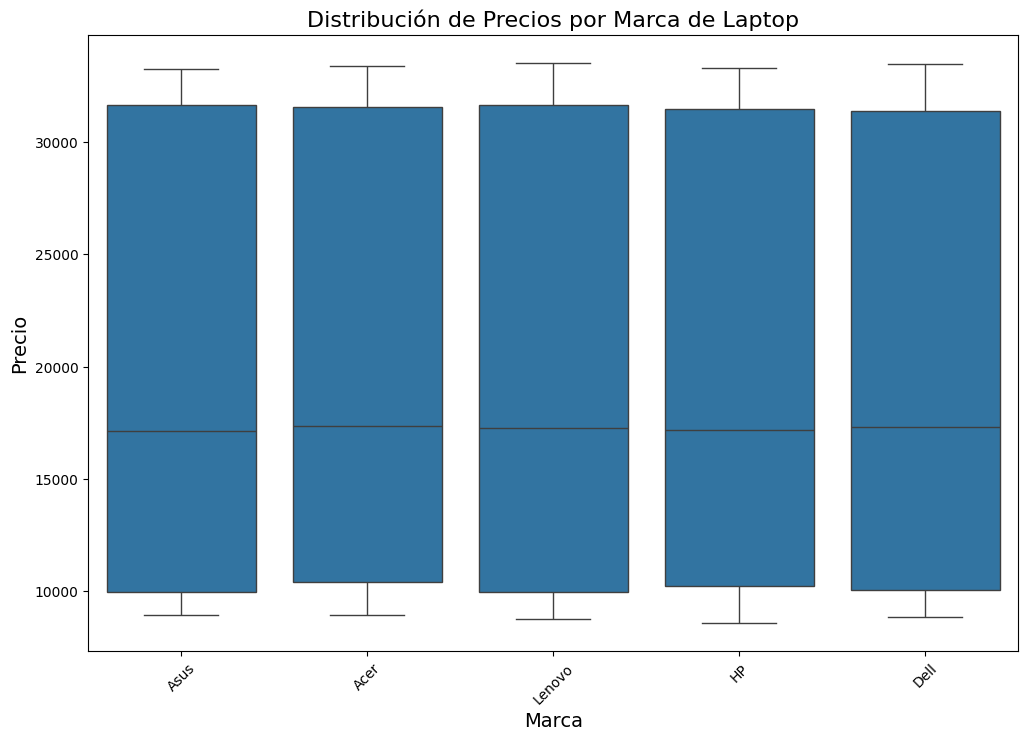

In [18]:
#GRAFICA DE DISTRIBUCION DE PRECIOS POR MARCA DE LAPTOPS
plt.figure(figsize=(12, 8))  
sns.boxplot(x='Brand', y='Price', data=data)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14)  
plt.ylabel('Precio', fontsize=14)  
plt.title('Distribución de Precios por Marca de Laptop', fontsize=16)  
plt.show()

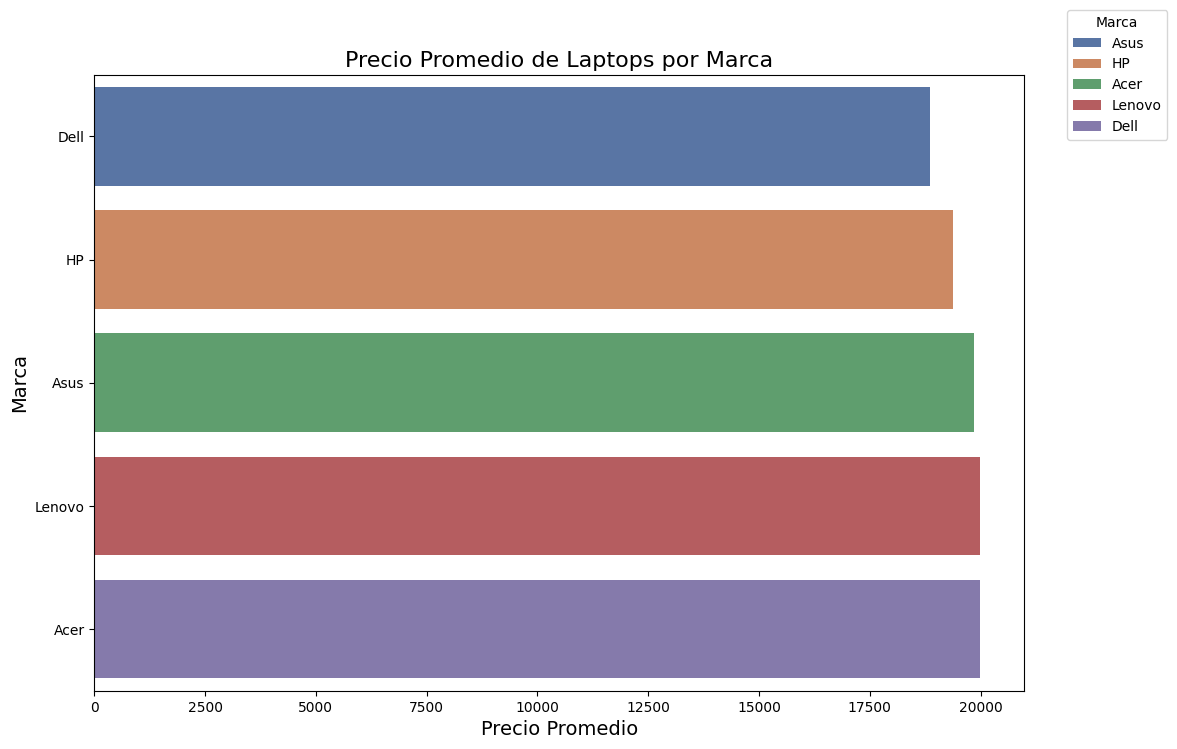

In [53]:
#GRAFICA DEL PROMEDIO DE PRECIO SEGUN SU MARCA
plt.figure(figsize=(12, 8))  
sns.barplot(x=average_price_by_brand.values, y=average_price_by_brand.index, hue=average_ram_by_brand.index,palette='deep')  
plt.xlabel('Precio Promedio', fontsize=14)  
plt.ylabel('Marca', fontsize=14)  
plt.title('Precio Promedio de Laptops por Marca', fontsize=16)  # Título del gráfico
plt.legend(title='Marca',bbox_to_anchor=(1.10, 1), loc='center')
plt.show()

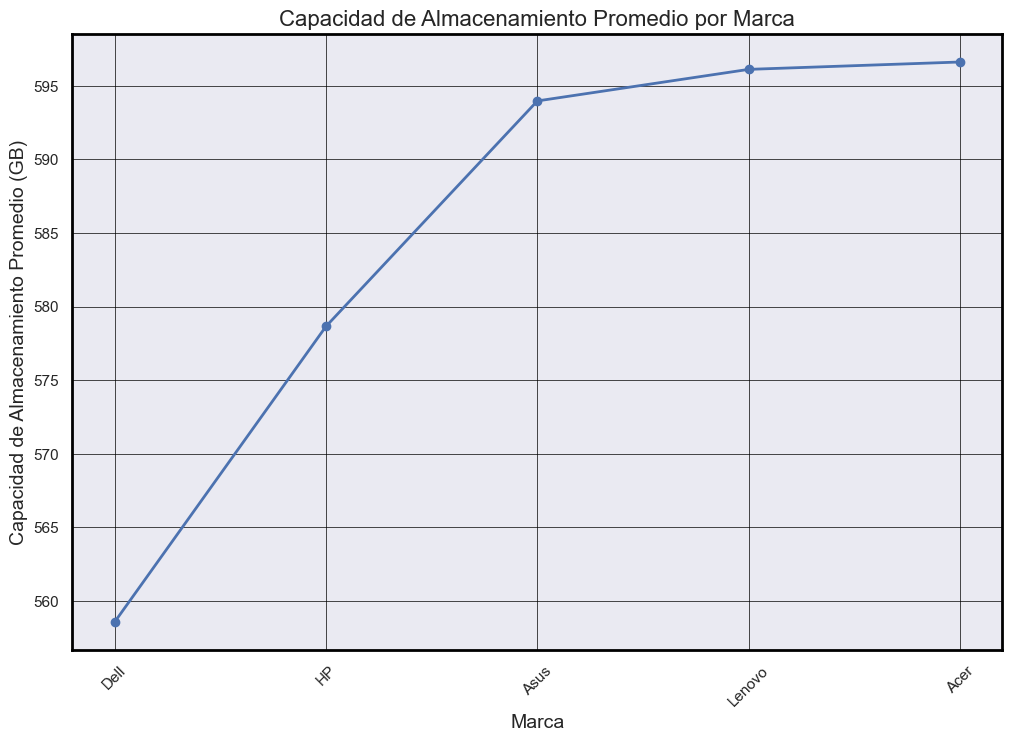

In [121]:
#GRAFICA DEL PROMEDIO DEL ALMACENAMIENTO POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_storage_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad de Almacenamiento Promedio (GB)', fontsize=14) 
plt.title('Capacidad de Almacenamiento Promedio por Marca', fontsize=16)  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()
plt.show()

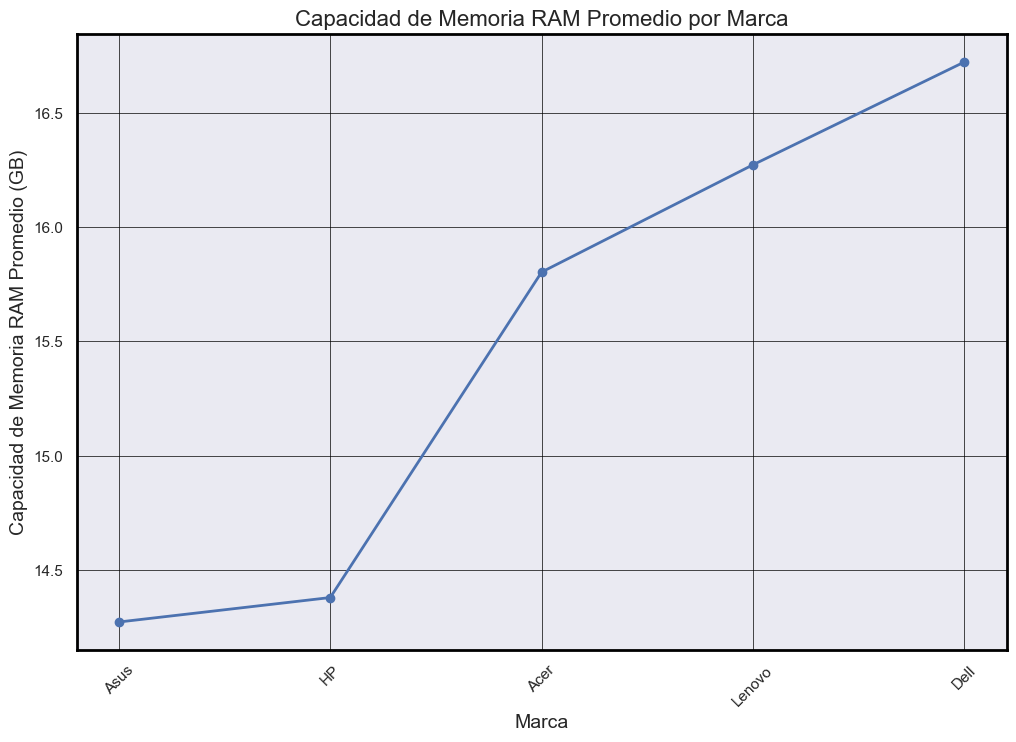

In [117]:
#GRAFICA DEL PROMEDIO DE LA MEMORIA RAM POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_ram_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad de Memoria RAM Promedio (GB)', fontsize=14) 
plt.title('Capacidad de Memoria RAM Promedio por Marca', fontsize=16)  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

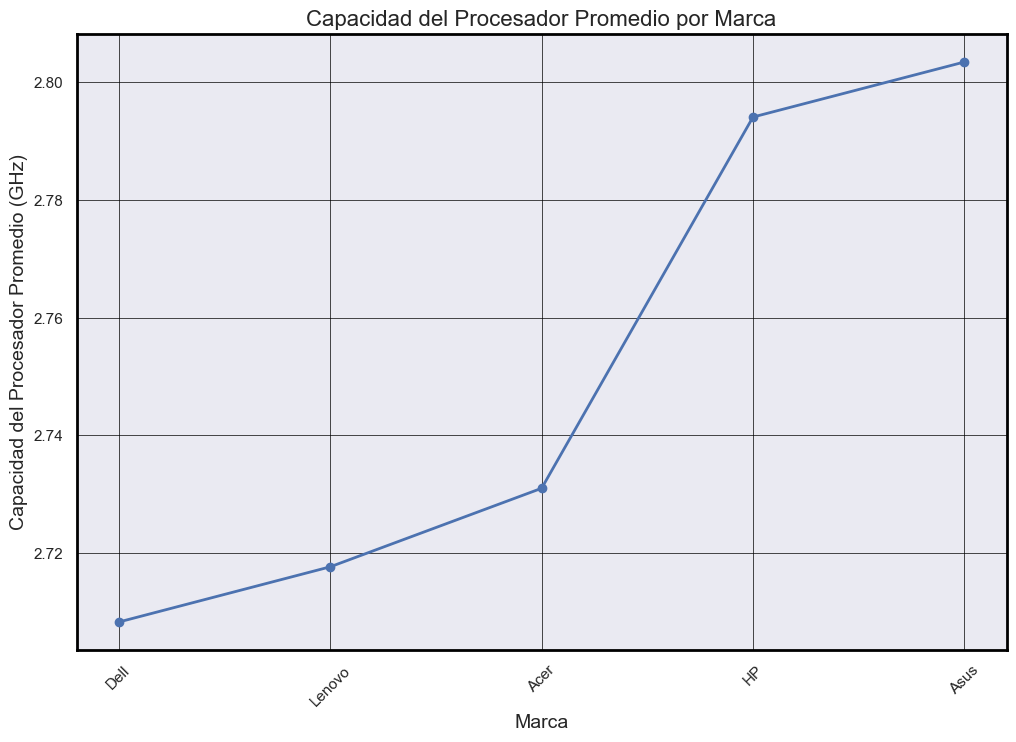

In [119]:
#GRAFICA DEL PROMEDIO DEl PROCESADOR POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_procesador_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad del Procesador Promedio (GHz)', fontsize=14) 
plt.title('Capacidad del Procesador Promedio por Marca', fontsize=16)  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

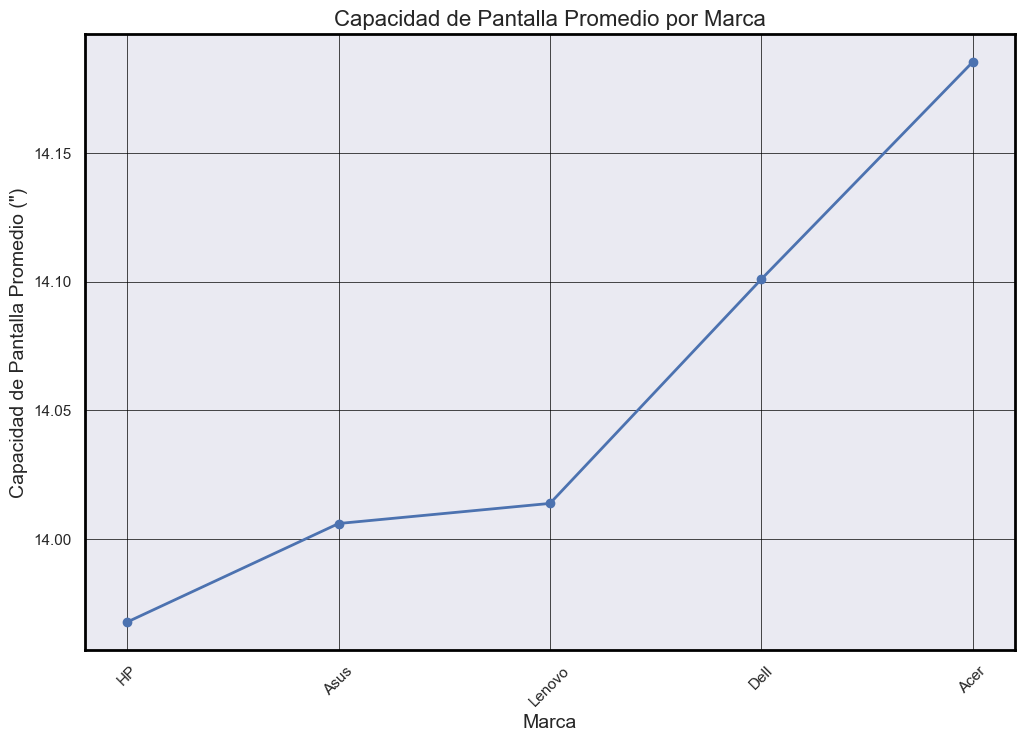

In [123]:
#GRAFICA DEL PROMEDIO DE LA PANTALLA POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_screen_size_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad de Pantalla Promedio (")', fontsize=14) 
plt.title('Capacidad de Pantalla Promedio por Marca', fontsize=16)  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

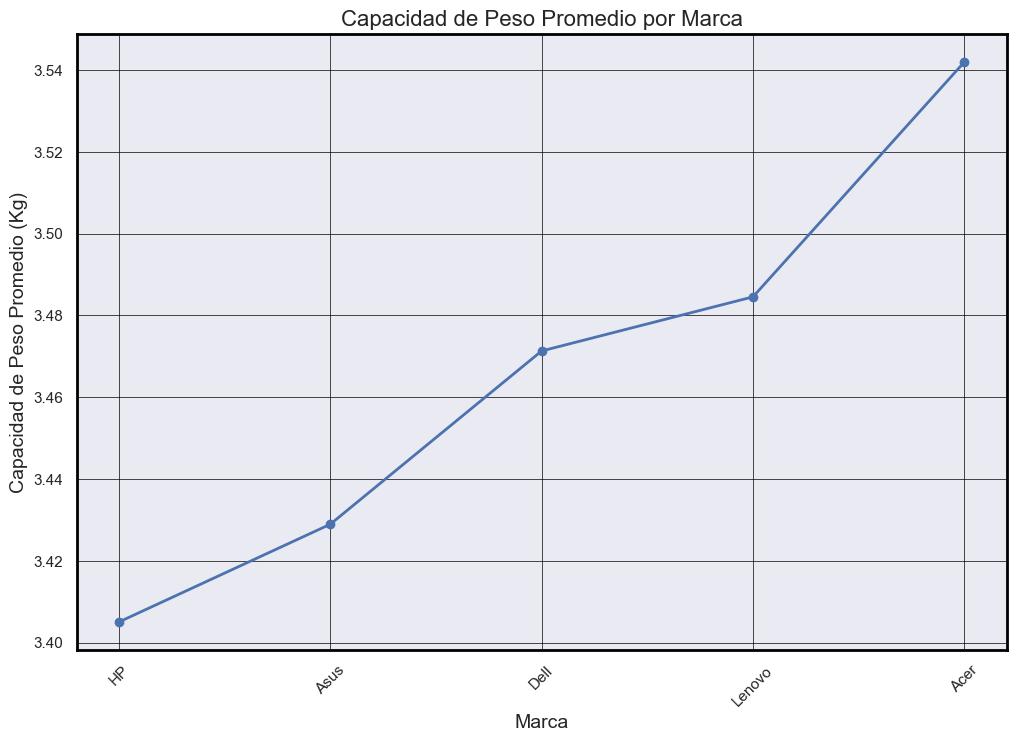

In [124]:
#GRAFICA DEL PROMEDIO DEL PESO POR MARCA
plt.figure(figsize=(12, 8))  
plt.plot(average_weight_by_brand, marker='o', linestyle='-', linewidth=2)  
plt.xticks(rotation=45)  
plt.xlabel('Marca', fontsize=14) 
plt.ylabel('Capacidad de Peso Promedio (Kg)', fontsize=14) 
plt.title('Capacidad de Peso Promedio por Marca', fontsize=16)  
plt.grid(True, linestyle='-', linewidth=0.5, color='black')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.show()

In [10]:
#DIAGRAMA DE CORRELACION
correlacion_diagrama = data_nueva.corr(numeric_only=True)
correlacion_diagrama

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


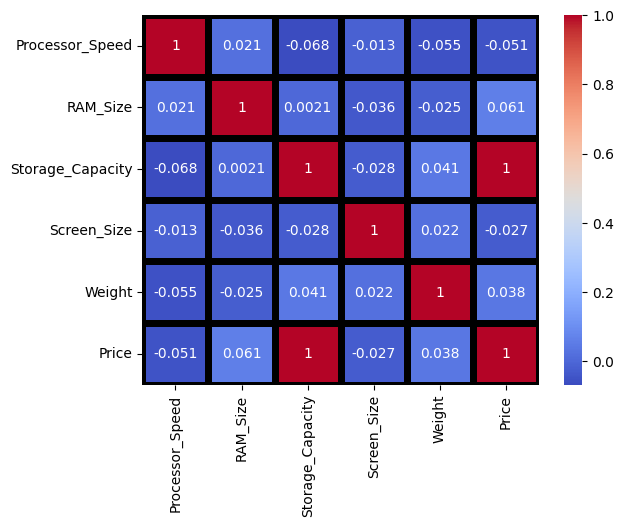

In [16]:
sns.heatmap(correlacion_diagrama, annot=True, cmap='coolwarm', linewidths=5, linecolor='black')
plt.show()

## Modelo de Entrenamiento(Train test split)

In [10]:
#Realizar el metodo de separacion de training - test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_nueva, test_size=0.2, random_state=1516)

In [11]:
#Validamos
train_set.shape

(800, 7)

In [12]:
test_set.shape

(200, 7)

In [8]:
data = pd.read_csv("Laptop_price.csv")

X = data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']]  # Características
y = data['Price']  # Etiqueta objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 32031.53913062828
Coeficiente de Determinación (R^2): 0.9996472163447738
